# Visualization and Prediction by Auto ML
## Guide

In [1]:
guide = "https://www.kaggle.com/code/sasakitetsuya/visualization-and-prediction-by-auto-ml"

## Make necessary imports

In [17]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from autoviz.AutoViz_Class import AutoViz_Class
from pycaret.classification import *
import pycaret.classification as cl

## Importing data
### Import data

In [3]:
od.download("https://www.kaggle.com/datasets/kukuroo3/body-performance-dataset")   # Got error, so I downloaded it manually

Skipping, found downloaded files in ".\body-performance-dataset" (use force=True to force download)


### Read data

In [4]:
file = 'body-performance-dataset/bodyPerformance.csv'
df = pd.read_csv(file)
df.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0    M      172.3      75.24       21.3       80.0       130.0    
1  25.0    M      165.0      55.80       15.7       77.0       126.0    
2  31.0    M      179.6      78.00       20.1       92.0       152.0    
3  32.0    M      174.5      71.10       18.4       76.0       147.0    
4  28.0    M      173.8      67.70       17.1       70.0       127.0    

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0    54.9              18.4                 60.0           217.0        C   
1    36.4              16.3                 53.0           229.0        A   
2    44.8              12.0                 49.0           181.0        C   
3    41.4              15.2                 53.0           219.0        B   
4    43.5              27.1                 45.0           217.0        B

### Preprocessing

In [5]:
df['class'].unique()

array(['C', 'A', 'B', 'D'], dtype=object)

In [6]:
df=df.replace({'M':0, 'F':1})
df=df.replace({'A':1,'B':2,'C':3,'D':4})

In [7]:
df.head()

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0     0      172.3      75.24       21.3       80.0       130.0    
1  25.0     0      165.0      55.80       15.7       77.0       126.0    
2  31.0     0      179.6      78.00       20.1       92.0       152.0    
3  32.0     0      174.5      71.10       18.4       76.0       147.0    
4  28.0     0      173.8      67.70       17.1       70.0       127.0    

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  class  
0    54.9              18.4                 60.0           217.0        3    
1    36.4              16.3                 53.0           229.0        1    
2    44.8              12.0                 49.0           181.0        3    
3    41.4              15.2                 53.0           219.0        2    
4    43.5              27.1                 45.0           217.0        2

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  int64  
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.2 MB


## Visualization by Autoviz

In [9]:
AV = AutoViz_Class()

In [10]:
url1 = './body-performance-dataset/bodyPerformance.csv'
df_viz = pd.read_csv(url1,index_col=None,thousands=',')
print(df_viz.shape)
df_viz.head()

(13393, 12)


age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0    M      172.3      75.24       21.3       80.0       130.0    
1  25.0    M      165.0      55.80       15.7       77.0       126.0    
2  31.0    M      179.6      78.00       20.1       92.0       152.0    
3  32.0    M      174.5      71.10       18.4       76.0       147.0    
4  28.0    M      173.8      67.70       17.1       70.0       127.0    

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0    54.9              18.4                 60.0           217.0        C   
1    36.4              16.3                 53.0           229.0        A   
2    44.8              12.0                 49.0           181.0        C   
3    41.4              15.2                 53.0           219.0        B   
4    43.5              27.1                 45.0           217.0        B

In [11]:
target = 'class'

Shape of your Data Set loaded: (13393, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification problem #####################
There are 1 duplicate rows in your dataset
    Alert: Dropping duplicate rows can sometimes cause your column data types to change to object!
    All variables classified into correct types.


AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

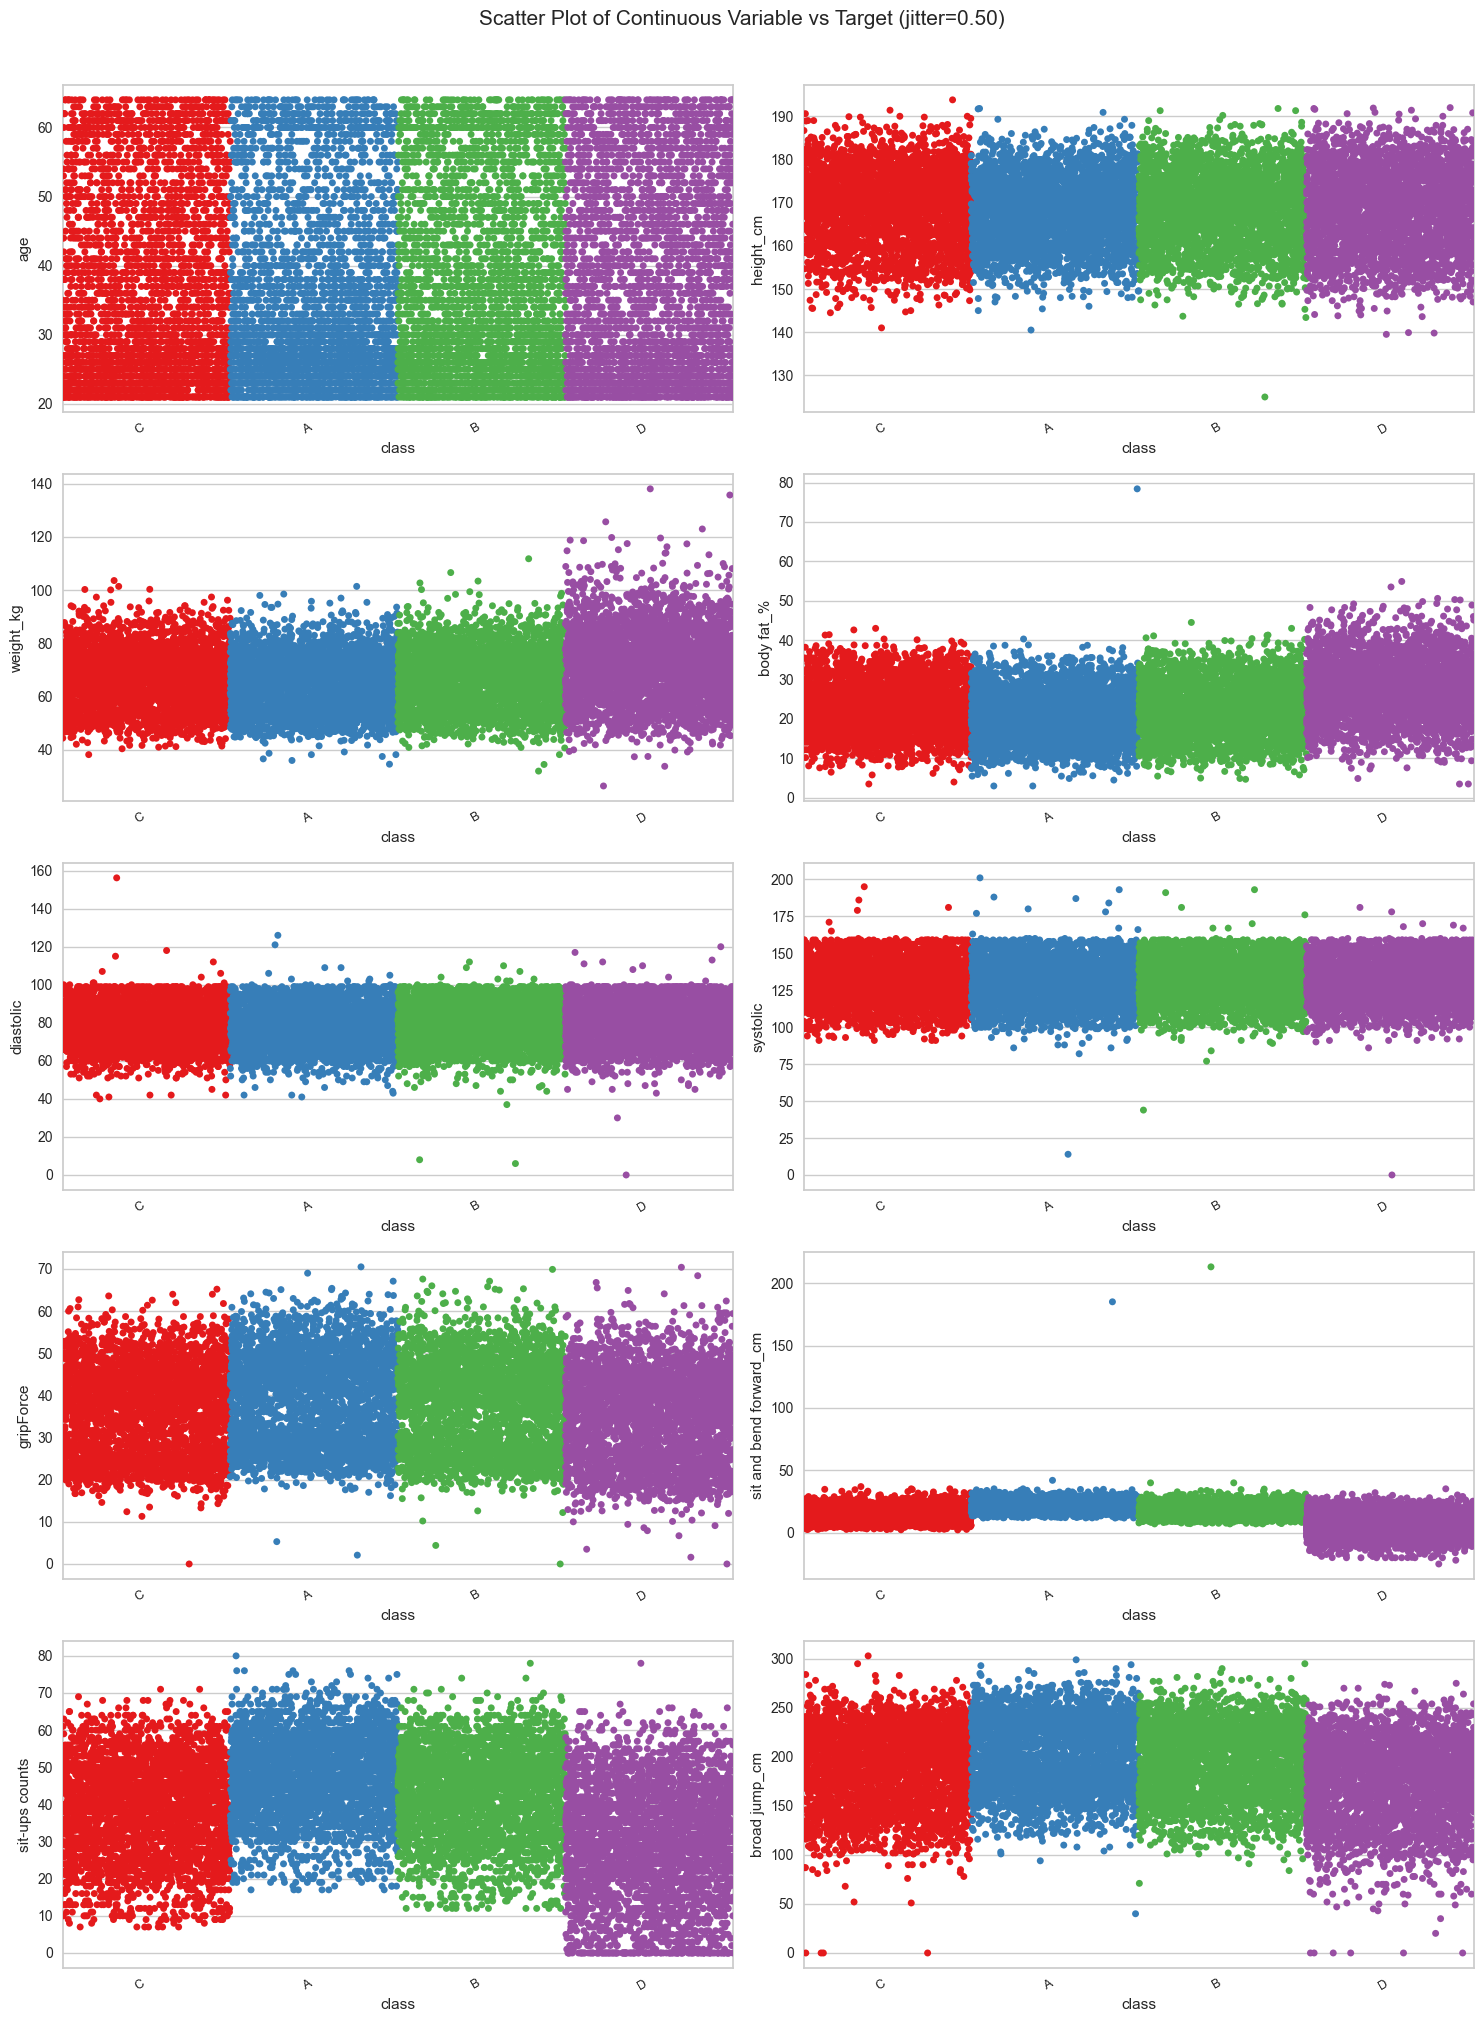

Total Number of Scatter Plots = 55


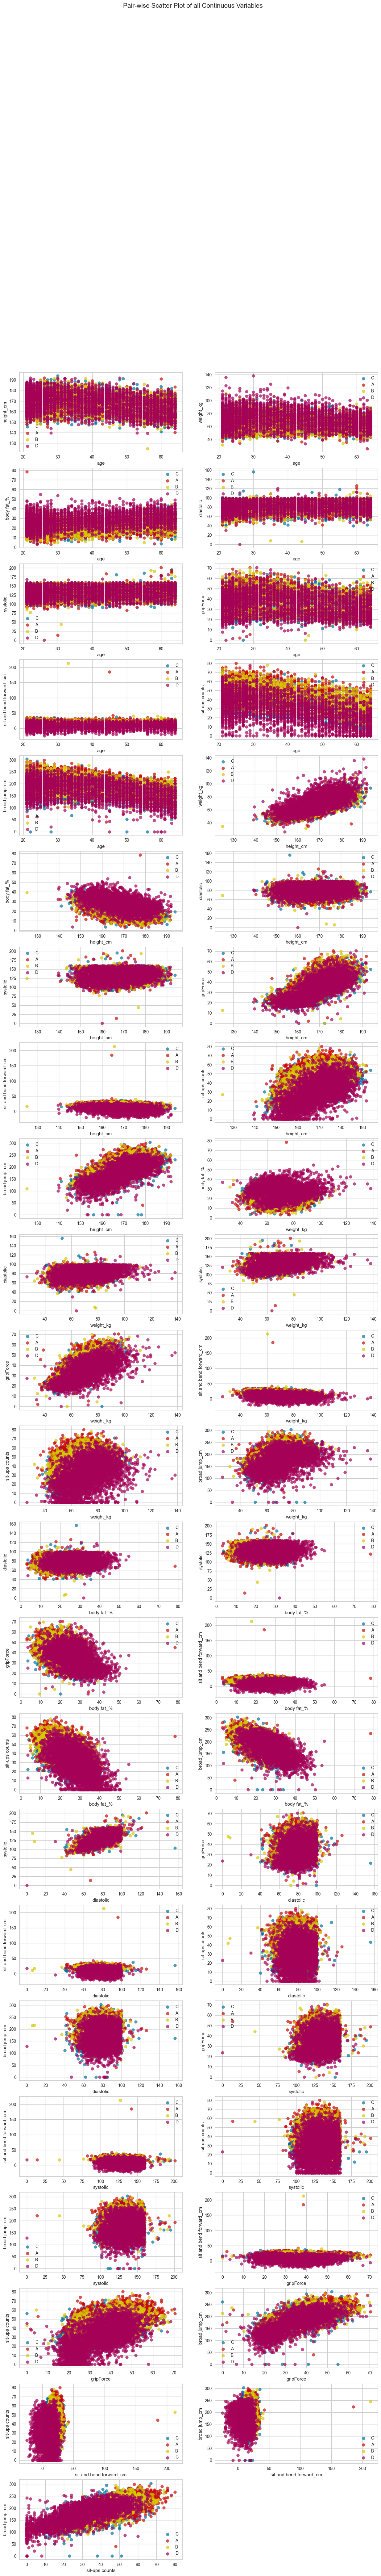

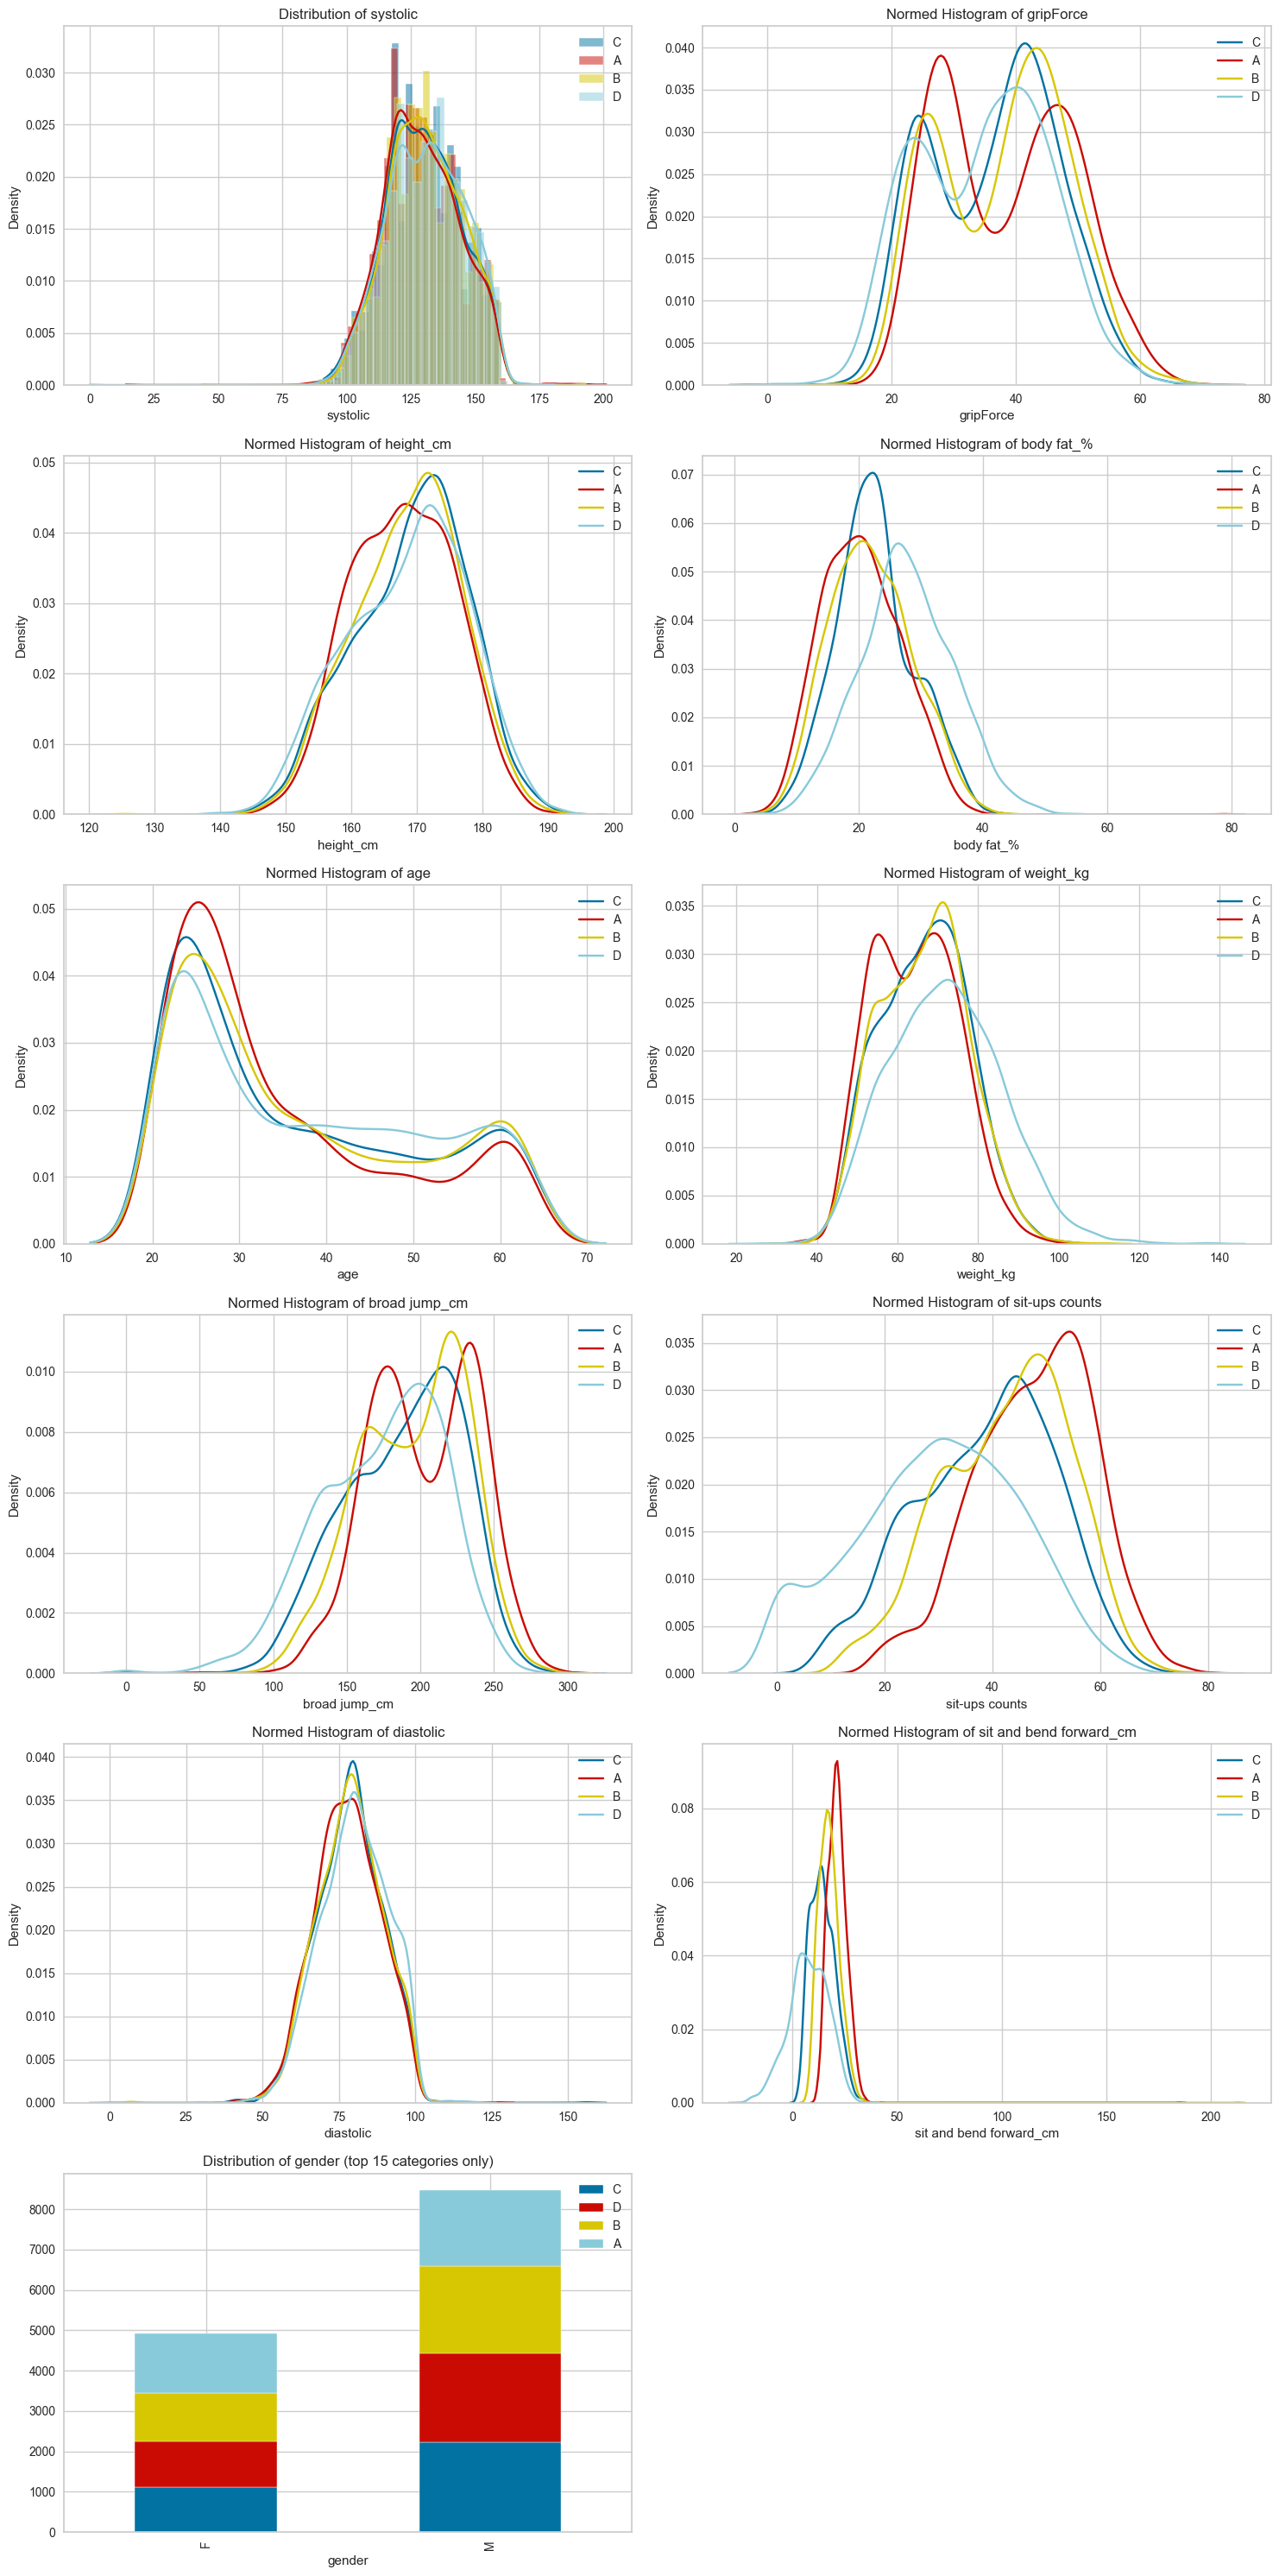

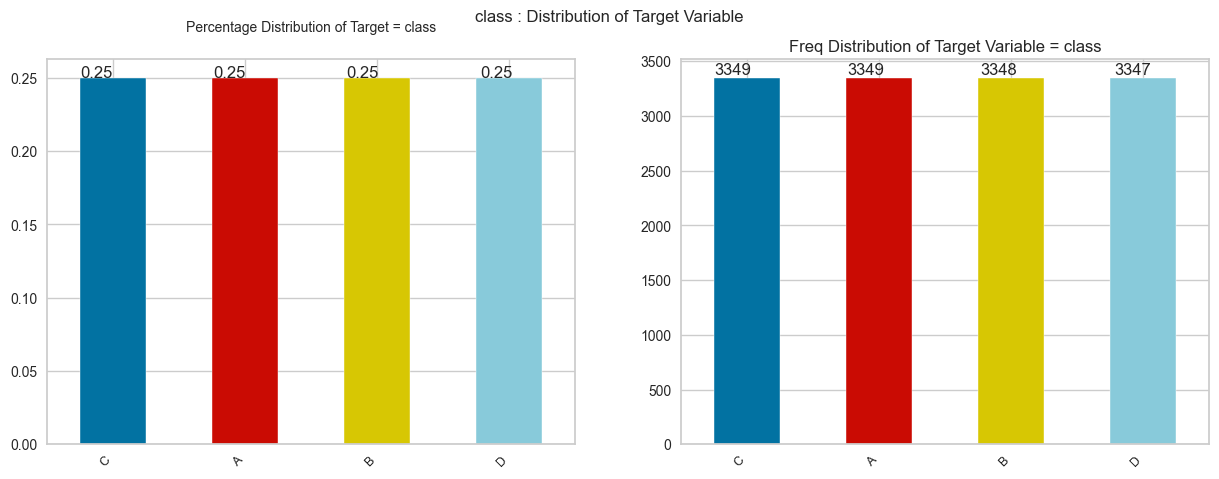

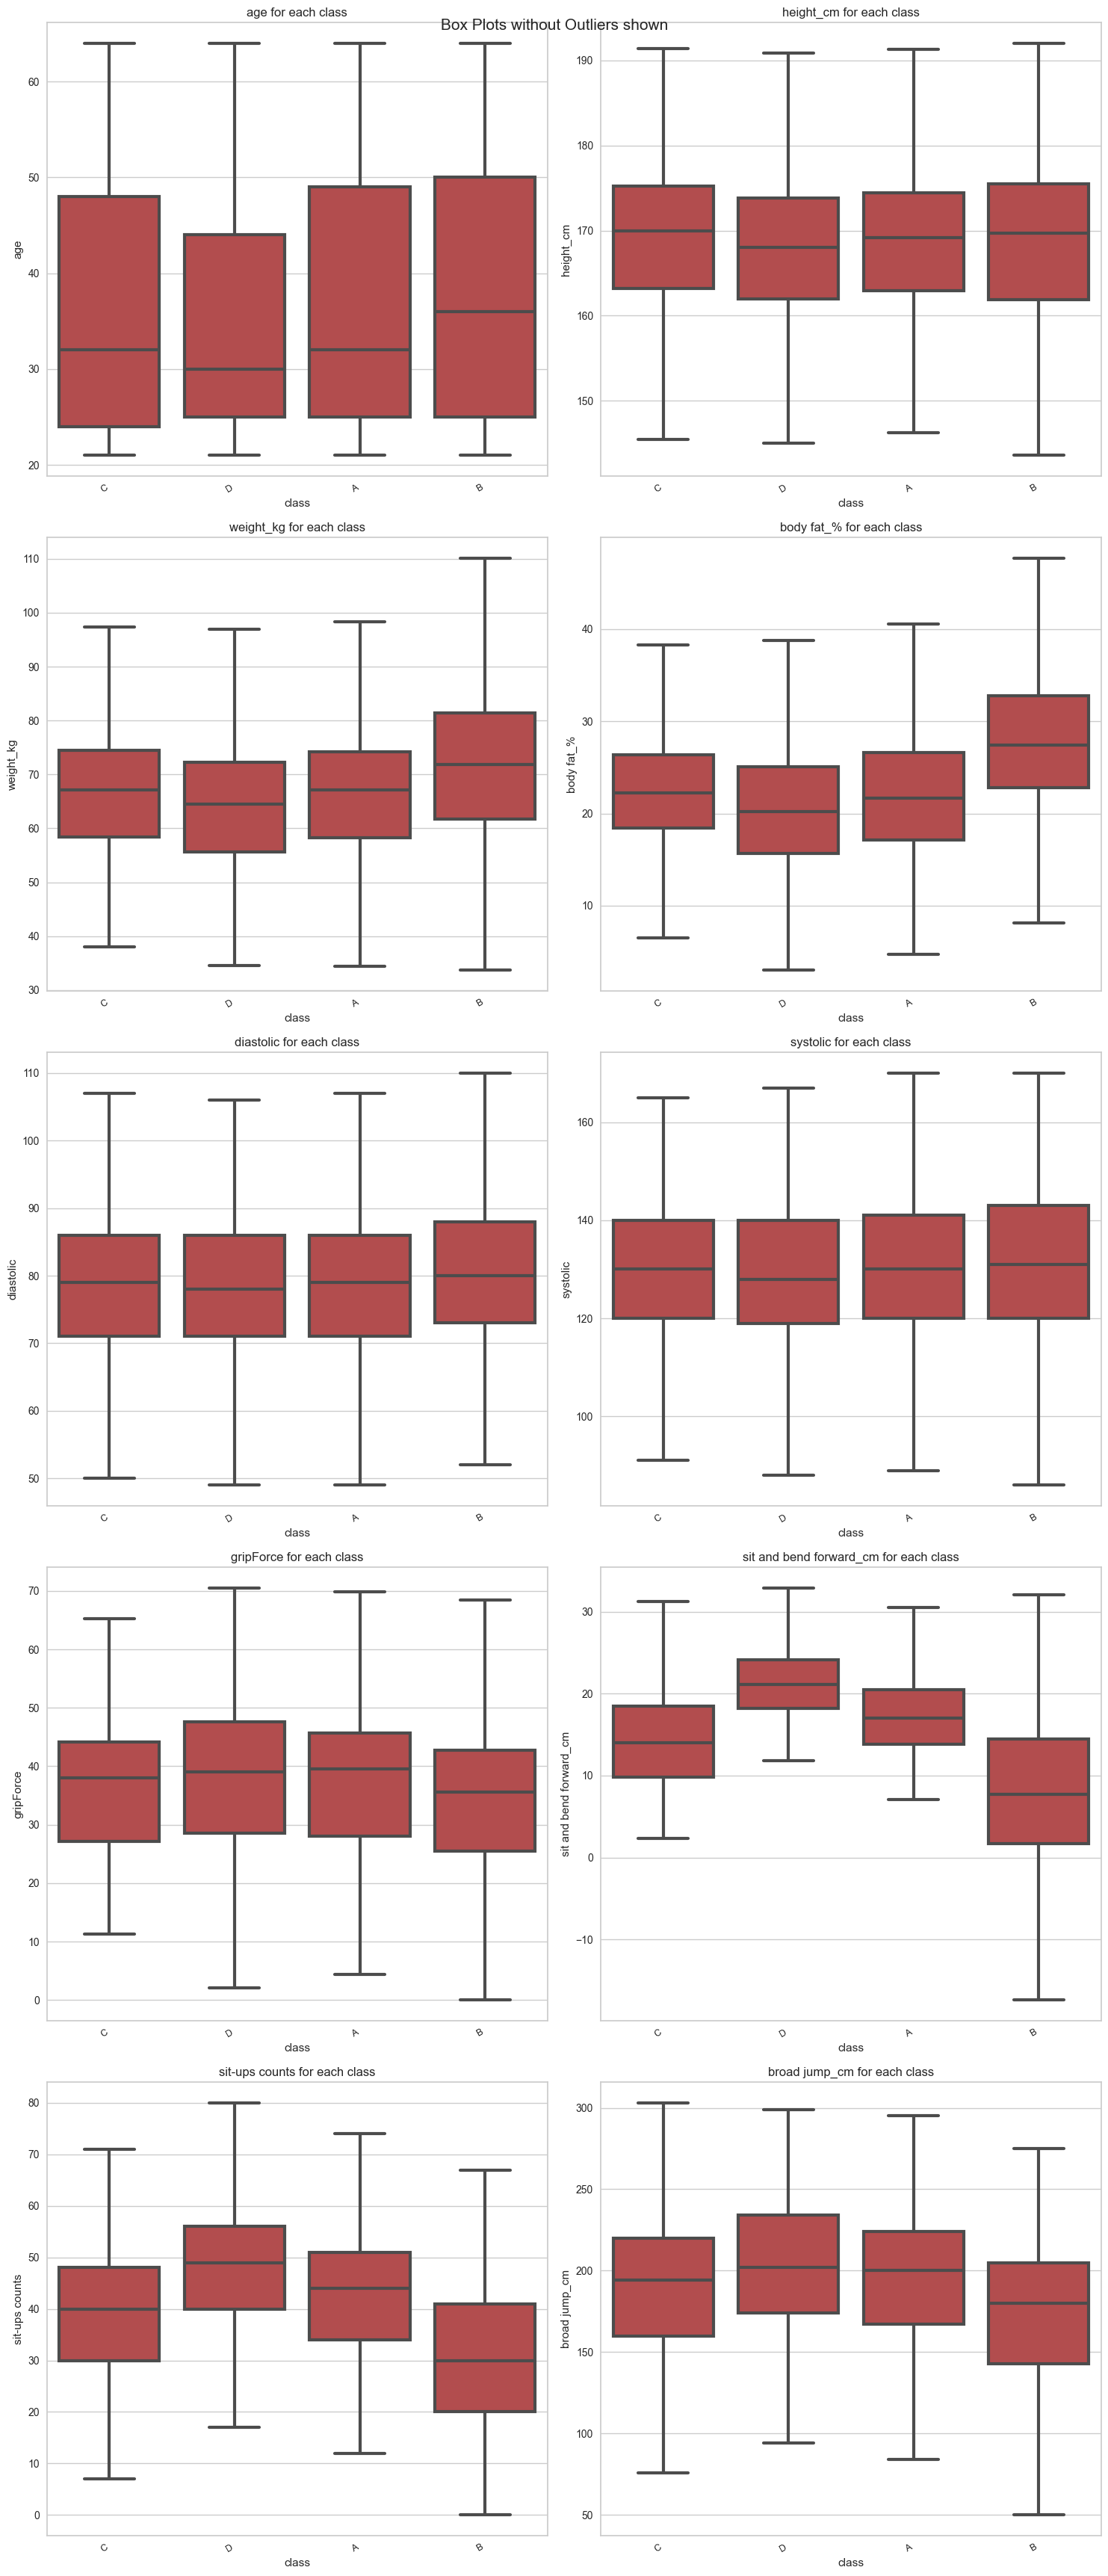

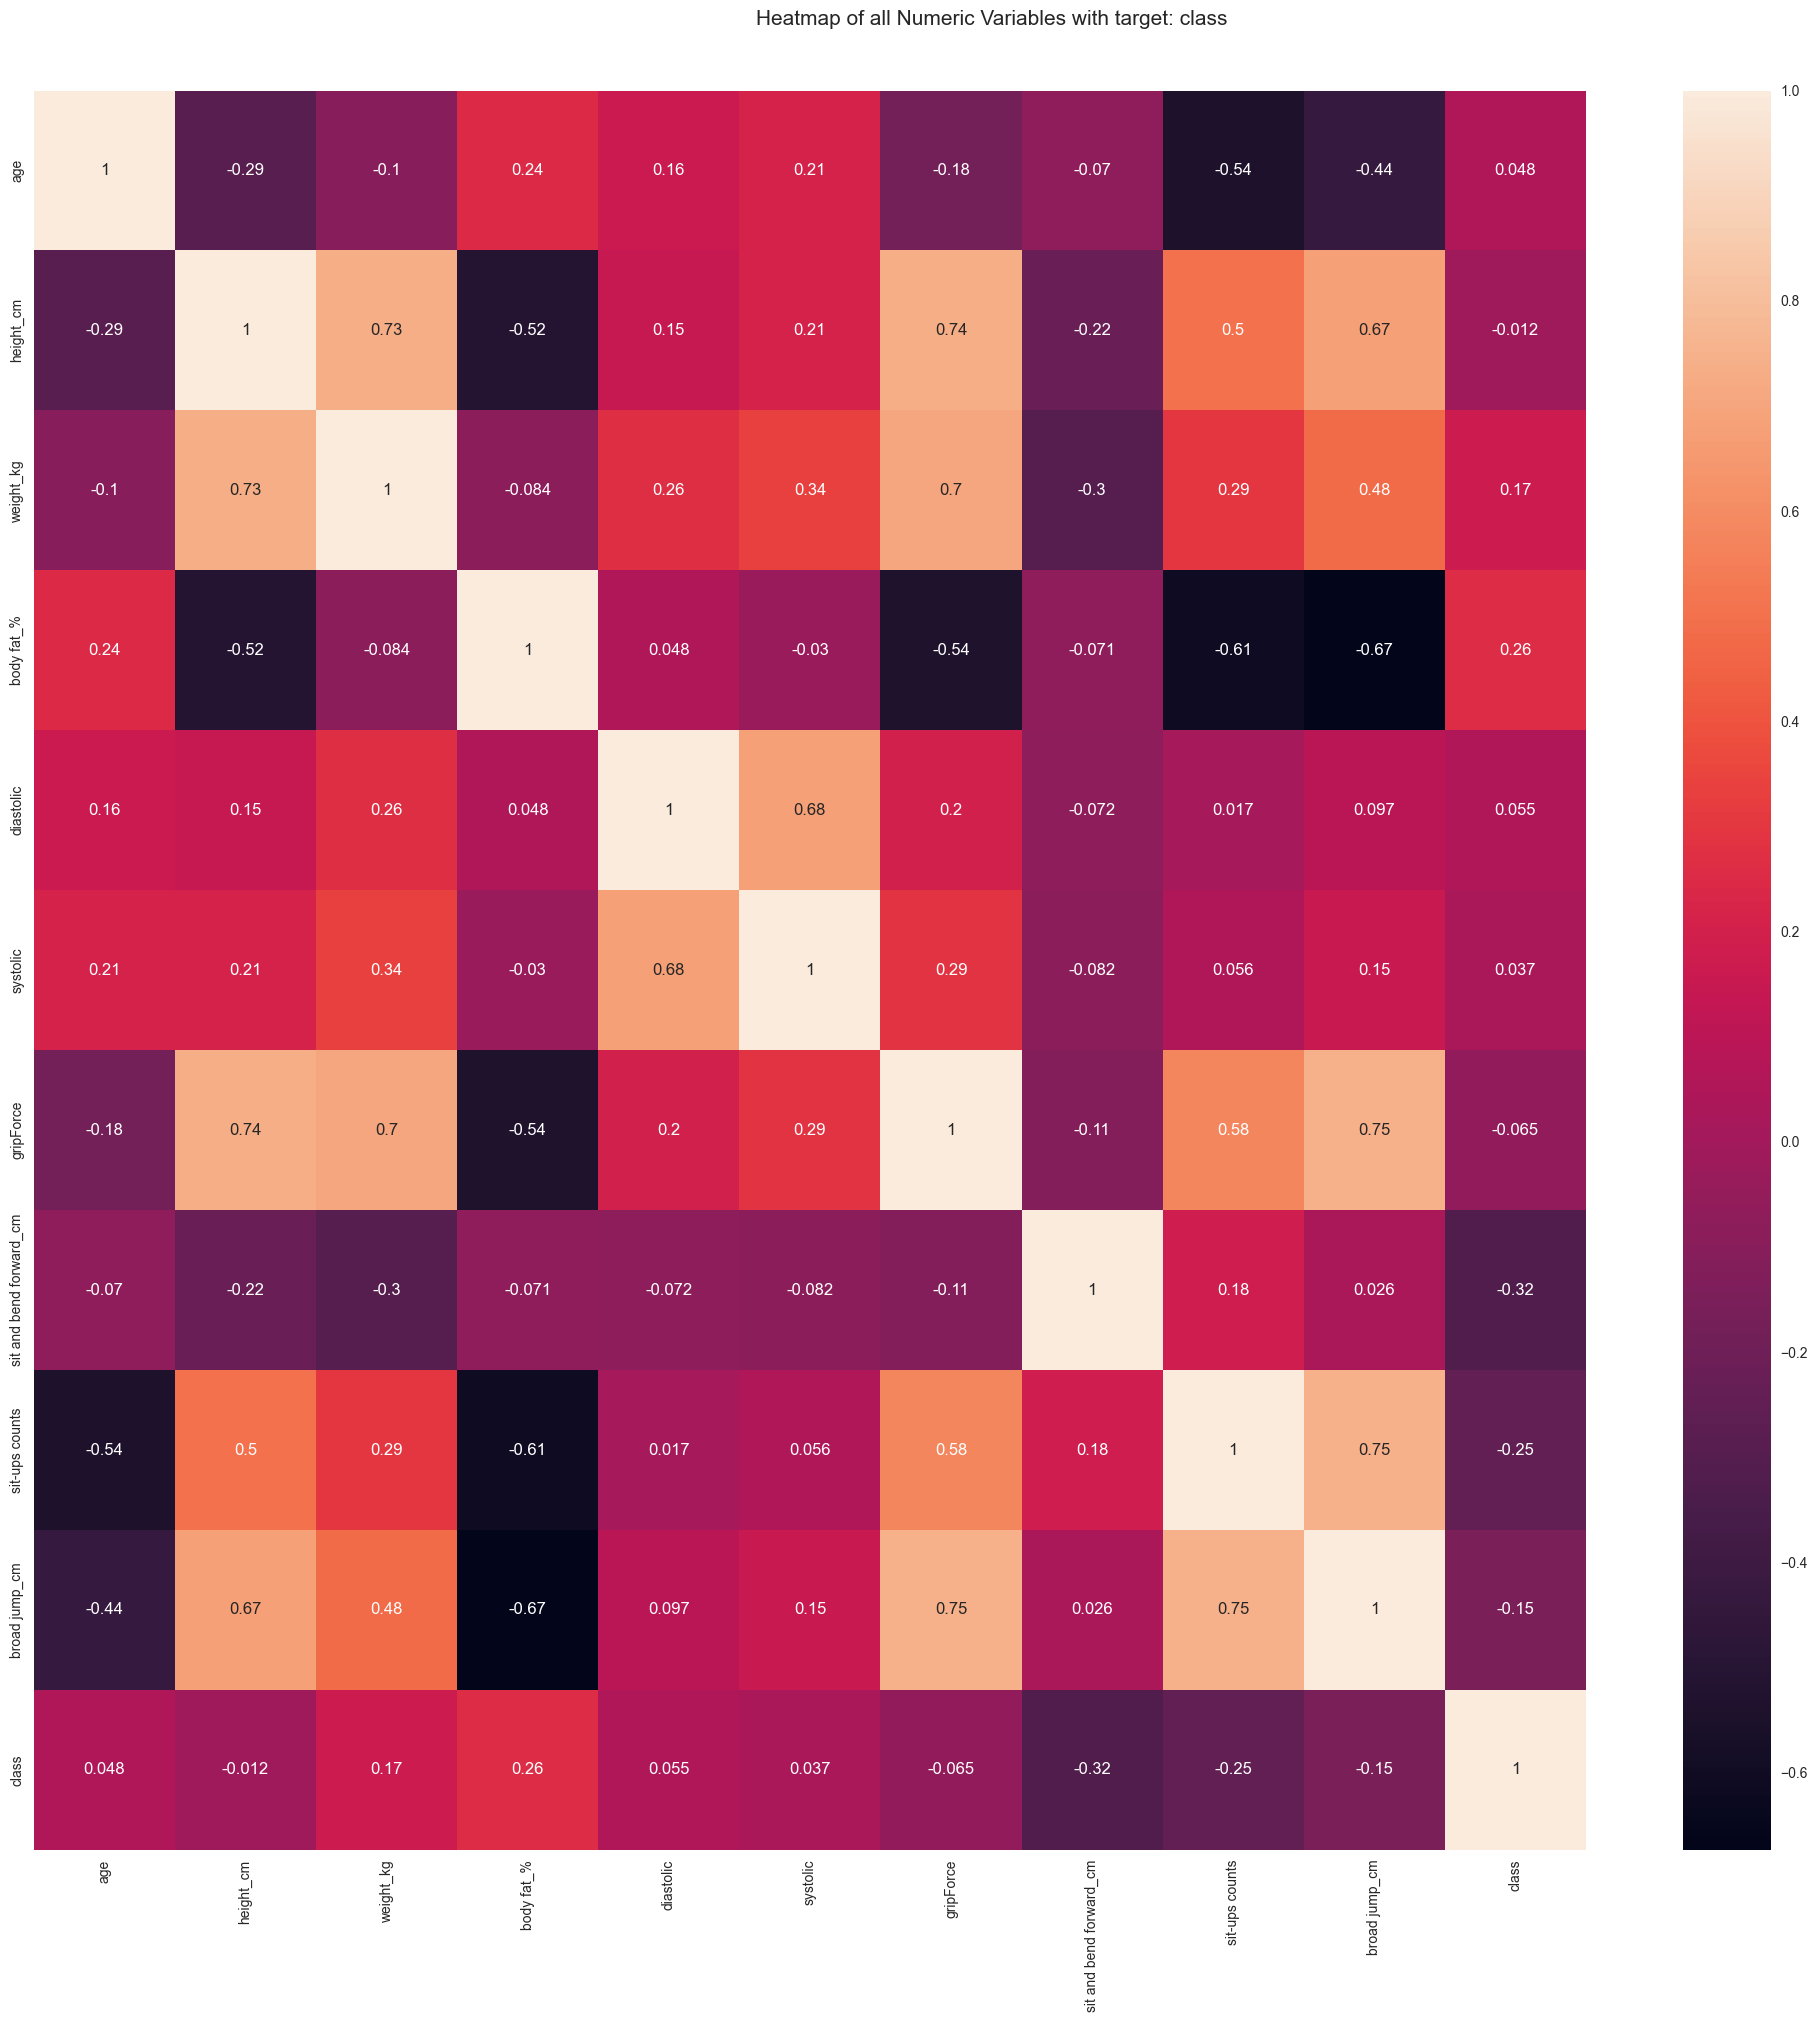

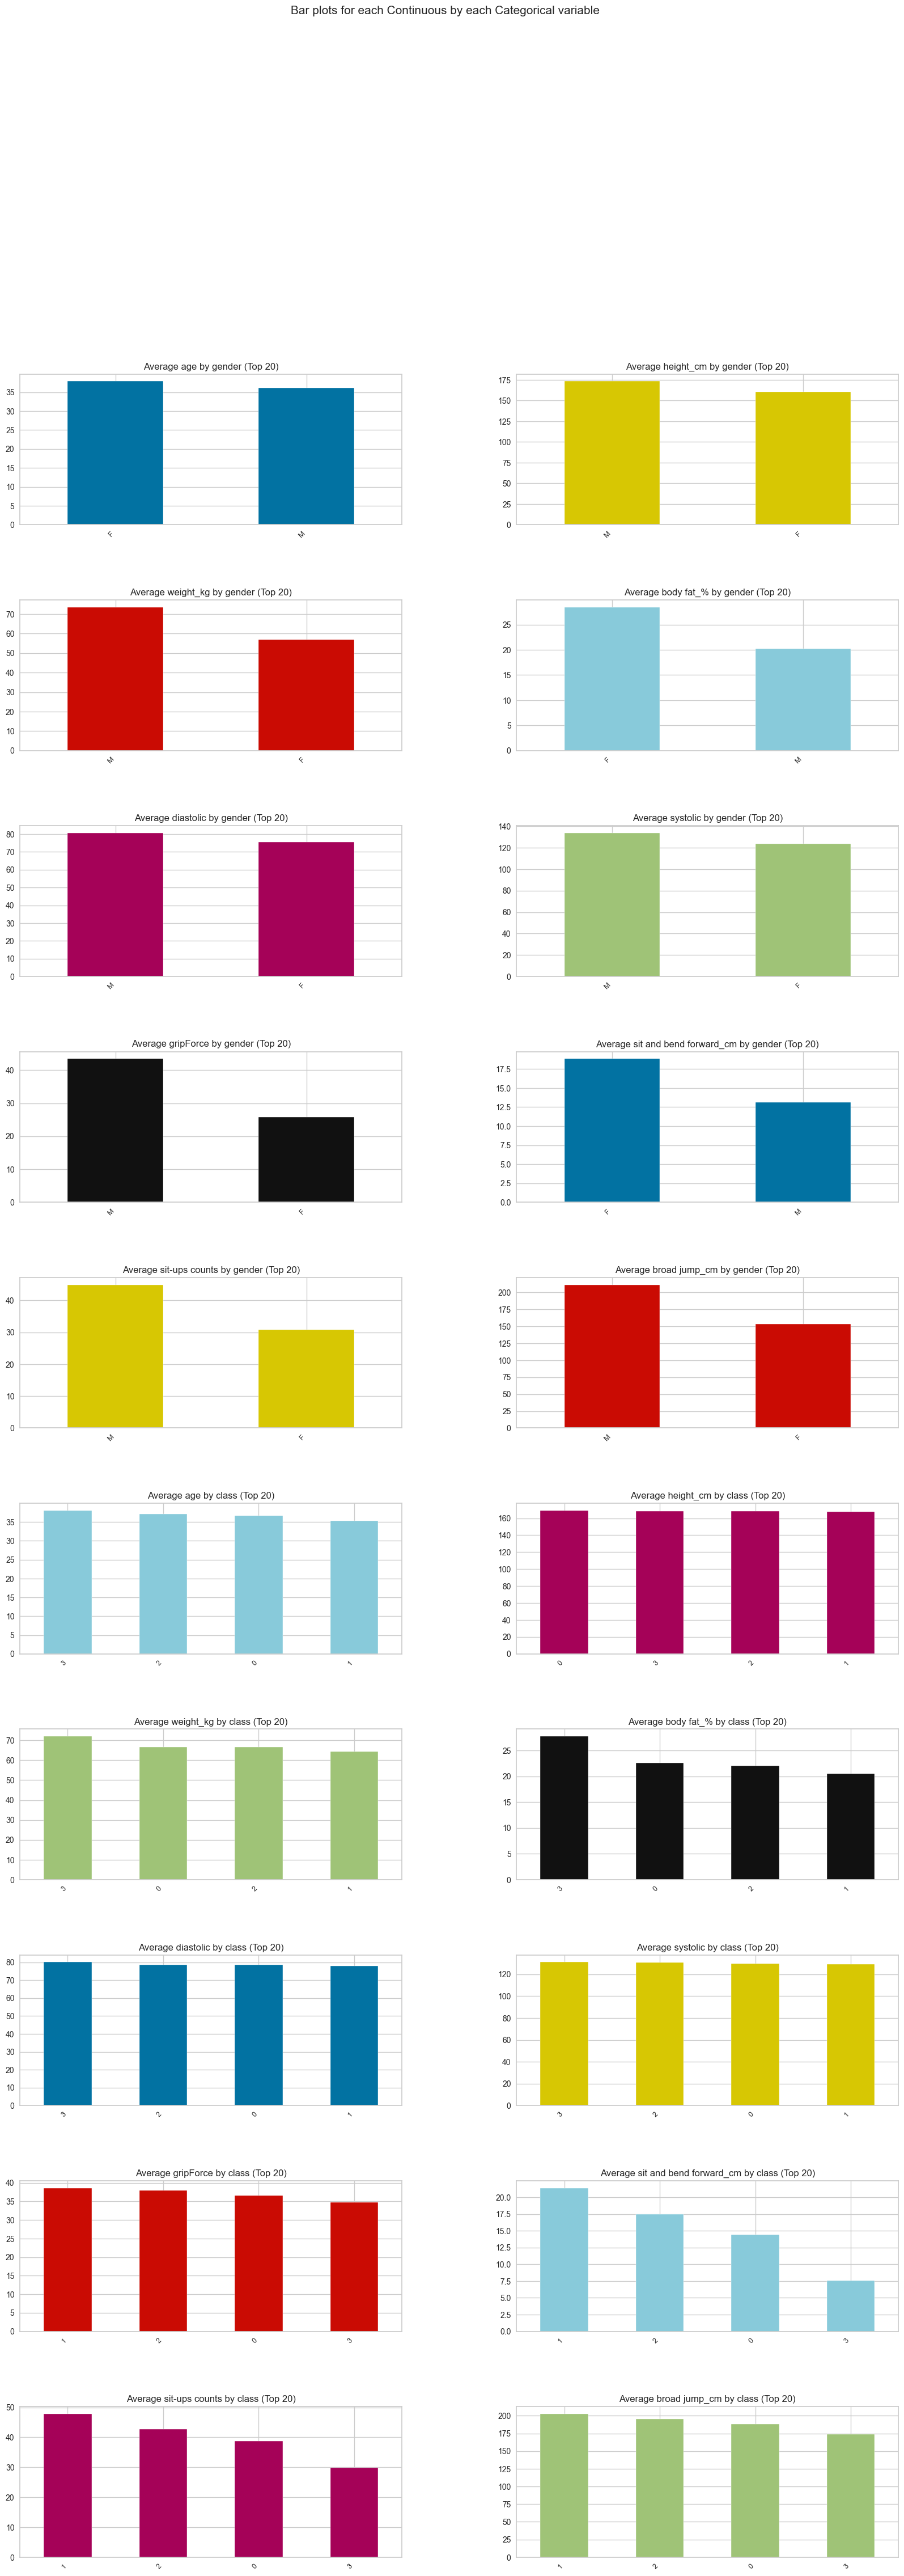

All Plots done
Time to run AutoViz = 35 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [12]:
dft = AV.AutoViz(depVar=target,dfte=df_viz, header=0, verbose=0,
                lowess=False,chart_format='svg',max_rows_analyzed=1500000,max_cols_analyzed=300,filename='', sep=',' )

## Multi Classification by PyCaret

In [23]:
exp_clf = cl.setup(df, target = 'class',session_id=1)

In [24]:
lgbm = cl.create_model('lightgbm')

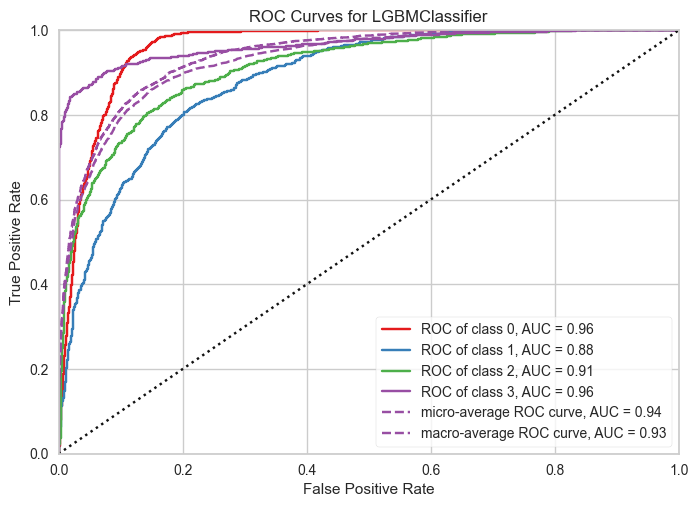

In [26]:
cl.plot_model(lgbm)

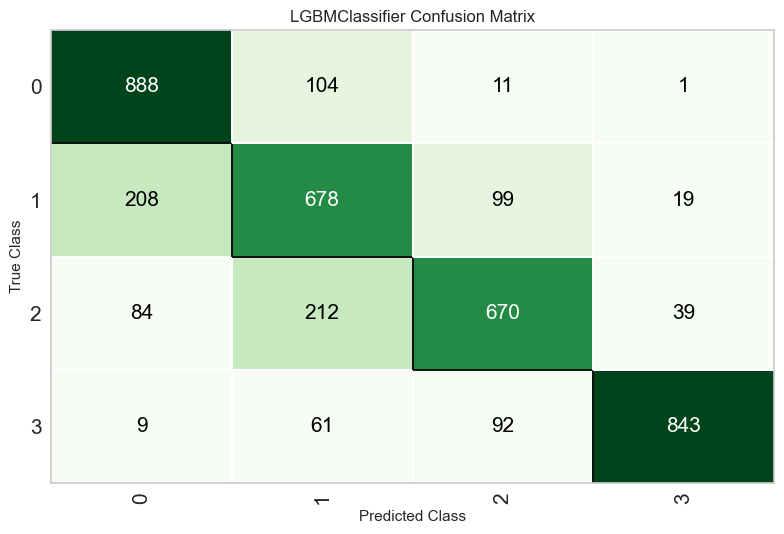

In [28]:
cl.plot_model(lgbm, plot = 'confusion_matrix') 

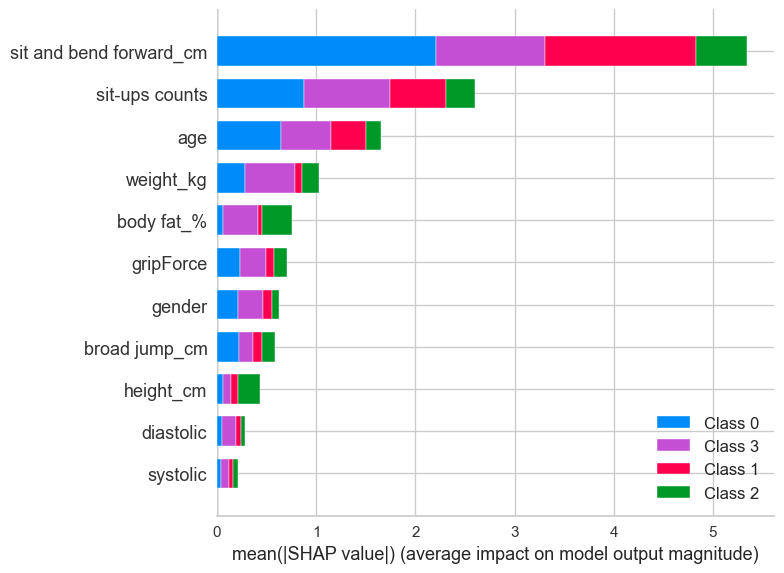

In [29]:
cl.interpret_model(lgbm)

In [30]:
# Testing
tuned_lgbm = cl.tune_model(lgbm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
